In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
BASE_PATH = 'D:/Learning/LJMU-masters/recommender_system/workspace/rest_procssed_data/'
review_file = BASE_PATH+'filt_rest_review_data.tar.gz'
restaurant_feat_file = BASE_PATH+'rest_context_feat.csv'

## Read the restaurants data and review data to form matrices

In [4]:
review_df = pd.read_csv(review_file,compression='gzip')
print(review_df.columns.values)
print(review_df.shape)

['business_id' 'stars' 'date' 'user_id']
(1324324, 4)


In [5]:
review_df['date'] = pd.to_datetime(review_df['date'].str.strip(), errors='coerce', format='%Y-%m-%d %H:%M:%S')
review_df.head()

,business_id,stars,date,user_id
0,3fw2X5bZYeW9xCz_zGhOHg,3.0,2016-05-07 01:21:02,jlu4CztcSxrKx56ba1a5AQ
1,NyLYY8q1-H3hfsTwuwLPCg,4.0,2015-01-03 22:47:34,86J5DwcFk4f4In1Vxe2TvA
2,y-Iw6dZflNix4BdwIyTNGA,3.0,2014-06-27 21:19:23,_N7Ndn29bpll_961oPeEfw
3,qx6WhZ42eDKmBchZDax4dQ,5.0,2017-03-27 01:14:37,DzZ7piLBF-WsJxqosfJgtA
4,9nTF596jDvBBia2EXXiOOg,1.0,2014-04-19 15:03:17,q3GeSW9dWN9r_ocqFkhrvg


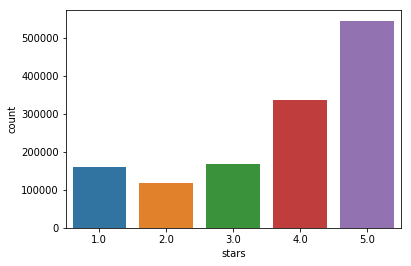

In [6]:
ax = sns.countplot(review_df['stars'])

In [7]:
grped_review_df = review_df.groupby(['business_id','user_id'])['date'].count().reset_index()
grped_review_df.columns = ['business_id','user_id','review_count']
grped_review_df.sort_values('review_count',ascending=False).head()

,business_id,user_id,review_count
408521,J3H6VSIgUTlACkb_HPFA8w,JlQ-9fc61X9lbzZN6ZjORQ,61
60797,1mb44krcyBOylDiyx_3ORg,xq1zRJz5VHgEKiCaI51_Gw,19
1078384,pxRy9F0HwN7zJ7J89AwUpQ,JlQ-9fc61X9lbzZN6ZjORQ,18
937476,i9D9xPBV0gR1Ja9kbY4NCw,U4INQZOPSUaj8hMjLlZ3KA,16
91735,33Tr0eRki1Yamzleu4GMdw,U4INQZOPSUaj8hMjLlZ3KA,15


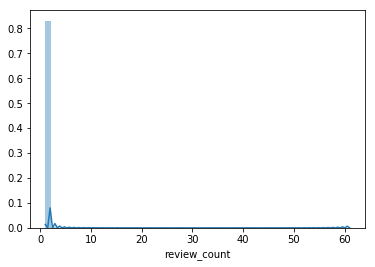

In [8]:
grped_review_df['review_count'] = pd.to_numeric(grped_review_df['review_count'])
ax = sns.distplot(grped_review_df['review_count'])

In [8]:
# cf_data_df = review_df.groupby(['business_id','user_id'])['date'].first().reset_index()
# cf_data_df.columns = ['business_id','user_id','date']

In [9]:
cf_data_df = review_df

In [10]:
print(len(cf_data_df.business_id.unique()))
print(len(cf_data_df.user_id.unique()))

19590
544347


## Pre-Process the user-restaurants ratings as arrays

In [11]:
# cf_data_df

# create a mapping for movie ids
unique_restids = set(cf_data_df.business_id.values)
rest_idx_dict = {}
count = 0
for restid in unique_restids:
    rest_idx_dict[restid] = count
    count += 1

cf_data_df['rest_idx'] = cf_data_df.apply(lambda row: rest_idx_dict[row.business_id], axis=1)

In [12]:
unique_userids = set(cf_data_df.user_id.values)
user_idx_dict = {}
count = 0
for userid in unique_userids:
    user_idx_dict[userid] = count
    count += 1
    
cf_data_df['user_idx'] = cf_data_df.apply(lambda row: user_idx_dict[row.user_id], axis=1)

In [13]:
print(cf_data_df.rest_idx.max()+1)
print(cf_data_df.user_idx.max()+1)

cf_data_df.head()

19590
544347


,business_id,stars,date,user_id,rest_idx,user_idx
0,3fw2X5bZYeW9xCz_zGhOHg,3.0,2016-05-07 01:21:02,jlu4CztcSxrKx56ba1a5AQ,2933,139962
1,NyLYY8q1-H3hfsTwuwLPCg,4.0,2015-01-03 22:47:34,86J5DwcFk4f4In1Vxe2TvA,18143,303190
2,y-Iw6dZflNix4BdwIyTNGA,3.0,2014-06-27 21:19:23,_N7Ndn29bpll_961oPeEfw,6099,254012
3,qx6WhZ42eDKmBchZDax4dQ,5.0,2017-03-27 01:14:37,DzZ7piLBF-WsJxqosfJgtA,6414,257447
4,9nTF596jDvBBia2EXXiOOg,1.0,2014-04-19 15:03:17,q3GeSW9dWN9r_ocqFkhrvg,4939,35901


In [14]:
# cf_data_df = pd.merge(cf_data_df,review_df[['business_id','user_id','date','stars']],on=['business_id','user_id','date'],how='left')
# cf_data_df.head()

In [15]:
user_rest_rating = cf_data_df[['rest_idx','user_idx','stars']]
user_rest_rating.to_csv(BASE_PATH+'user_rest_rating.csv',index=False)

# rest_index = cf_data_df[['business_id','rest_idx']].drop_duplicates()
# rest_index.to_csv(BASE_PATH+'rest_index.csv',index=False)

# user_index = cf_data_df[['user_id','user_idx']].drop_duplicates()
# user_index.to_csv(BASE_PATH+'user_index.csv',index=False)

In [16]:
user_rest_rating.user_idx.max()+1

544347

In [212]:
user_rest_rating.rest_idx.max()+1

19590

In [17]:
len(user_rest_rating.user_idx.unique())

544347

In [18]:
len(user_rest_rating.user_idx)

1324324

## Evaluation Functions definition

## Data Train-Test Split and pre-processing for training

In [19]:
from sklearn.utils import shuffle
import pickle
from datetime import datetime

In [20]:
user_rest_rating = pd.read_csv(BASE_PATH+'user_rest_rating.csv')
print(user_rest_rating.shape)
user_rest_rating.head()

(1324324, 3)


,rest_idx,user_idx,stars
0,2933,139962,3.0
1,18143,303190,4.0
2,6099,254012,3.0
3,6414,257447,5.0
4,4939,35901,1.0


In [21]:
user_rest_rating = shuffle(user_rest_rating)
cutoff = int(0.8*len(user_rest_rating))
df_train = user_rest_rating.iloc[:cutoff]
df_test = user_rest_rating.iloc[cutoff:]

In [22]:
print(df_test.shape)
print(df_train.shape)

(264865, 3)
(1059459, 3)


In [8]:
# a dictionary to tell us which users have rated which restaurants
user2rest = {}
# a dicationary to tell us which restaurants have been rated by which users
rest2user = {}
# a dictionary to look up ratings
userrest2rating = {}

def update_user2rest_and_rest2user(row):
    i = int(row.user_idx)
    j = int(row.rest_idx)
    if i not in user2rest:
        user2rest[i] = [j]
    else:
        user2rest[i].append(j)

    if j not in rest2user:
        rest2user[j] = [i]
    else:
        rest2user[j].append(i)

    userrest2rating[(i,j)] = row.stars
    
df_train.apply(update_user2rest_and_rest2user, axis=1)

len(userrest2rating.keys())

1024609

In [9]:
# test ratings dictionary
userrest2rating_test = {}

def update_userrest2rating_test(row):
    i = int(row.user_idx)
    j = int(row.rest_idx)
    userrest2rating_test[(i,j)] = row.stars
    
df_test.apply(update_userrest2rating_test, axis=1)

len(userrest2rating_test.keys())

256153

In [10]:
# note: these are not really JSONs
with open(BASE_PATH+'user2rest.pkl', 'wb') as f:
    pickle.dump(user2rest, f)

with open(BASE_PATH+'rest2user.pkl', 'wb') as f:
    pickle.dump(rest2user, f)

with open(BASE_PATH+'userrest2rating.pkl', 'wb') as f:
    pickle.dump(userrest2rating, f)

with open(BASE_PATH+'userrest2rating_test.pkl', 'wb') as f:
    pickle.dump(userrest2rating_test, f)


## Build the Matrix Factorization Model

In [25]:
N = np.max(list(user2rest.keys())) + 1
# the test set may contain movies the train set doesn't have data on
m1 = np.max(list(rest2user.keys()))
m2 = np.max([m for (u, m), r in userrest2rating_test.items()])
M = max(m1, m2) + 1
print("N:", N, "M:", M)

N: 544347 M: 19590


In [26]:
user2rest_rating = {}
for i, rest_list in user2rest.items():
    r = np.array([userrest2rating[(i,j)] for j in rest_list])
    user2rest_rating[i] = (rest_list, r)
    
rest2user_rating = {}
for j, users in rest2user.items():
    r = np.array([userrest2rating[(i,j)] for i in users])
    rest2user_rating[j] = (users, r)

In [29]:
user2rest_rating[800]

([3266], array([3.]))

In [30]:
rest2userrating_test = {}
for (i, j), r in userrest2rating_test.items():
    if j not in rest2userrating_test:
        rest2userrating_test[j] = [[i], [r]]
    else:
        rest2userrating_test[j][0].append(i)
        rest2userrating_test[j][1].append(r)
for j, (users, r) in rest2userrating_test.items():
    rest2userrating_test[j][1] = np.array(r)

In [31]:
rest2userrating_test[4]

[[508590], array([5.])]

In [32]:
# initialize variables
K = 25 # latent dimensionality
W = np.random.randn(N, K)
b = np.zeros(N)
U = np.random.randn(M, K)
c = np.zeros(M)
mu = np.mean(list(userrest2rating.values()))
print(mu)

3.7461878103625974


In [33]:
def get_loss(m2u):
    # d: movie_id -> (user_ids, ratings)
    N = 0.
    sse = 0
    for j, (u_ids, r) in m2u.items():
        p = W[u_ids].dot(U[j]) + b[u_ids] + c[j] + mu
        delta = p - r
        sse += delta.dot(delta)
        N += len(r)
    return sse / N

In [34]:
# train the parameters
epochs = 25
reg_u = 120.0 # regularization penalty
reg_w = 120.0 # regularization penalty
train_losses = []
test_losses = []
for epoch in range(epochs):
    print("epoch:", epoch)
    epoch_start = datetime.now()
  # perform updates

  # update W and b
    t0 = datetime.now()
    for i in user2rest_rating.keys():
        m_ids, r = user2rest_rating[i]
        matrix = U[m_ids].T.dot(U[m_ids]) + np.eye(K) * reg_u
        vector = (r - b[i] - c[m_ids] - mu).dot(U[m_ids])
        bi = (r - U[m_ids].dot(W[i]) - c[m_ids] - mu).sum()

        # set the updates
        W[i] = np.linalg.solve(matrix, vector)
        b[i] = bi / (len(user2rest[i])+ reg_u) # + reg_u

#         if i % (N//10) == 0:
#             print("i:", i, "N:", N)
    print("updated W and b:", datetime.now() - t0)


  # update U and c
    t0 = datetime.now()
    for j in rest2user_rating.keys():
        try:
            u_ids, r = rest2user_rating[j]
            matrix = W[u_ids].T.dot(W[u_ids]) + np.eye(K) * reg_w
            vector = (r - b[u_ids] - c[j] - mu).dot(W[u_ids])
            cj = (r - W[u_ids].dot(U[j]) - b[u_ids] - mu).sum()

          # set the updates
            U[j] = np.linalg.solve(matrix, vector)
            c[j] = cj / (len(rest2user[j])+ reg_w) # + reg_w

#             if j % (M//10) == 0:
#                 print("j:", j, "M:", M)
        except KeyError:
          # possible not to have any ratings for a movie
            pass
    print("updated U and c:", datetime.now() - t0)
    print("epoch duration:", datetime.now() - epoch_start)


    # store train loss
    t0 = datetime.now()
    train_losses.append(get_loss(rest2user_rating))

    # store test loss
    test_losses.append(get_loss(rest2userrating_test))
    print("calculate cost:", datetime.now() - t0)
    print("train loss:", train_losses[-1])
    print("test loss:", test_losses[-1])

print("train losses:", train_losses)
print("test losses:", test_losses)

epoch: 0
updated W and b: 0:00:35.955012
updated U and c: 0:00:02.674969
epoch duration: 0:00:38.630981
calculate cost: 0:00:01.045033
train loss: 1.6536898625640328
test loss: 1.7719329112381257
epoch: 1
updated W and b: 0:00:33.965478
updated U and c: 0:00:02.590001
epoch duration: 0:00:36.555479
calculate cost: 0:00:00.990001
train loss: 1.63527536044203
test loss: 1.6868147130880553
epoch: 2
updated W and b: 0:00:35.853779
updated U and c: 0:00:02.696505
epoch duration: 0:00:38.551280
calculate cost: 0:00:01.093033
train loss: 1.636116199804919
test loss: 1.6776694661168414
epoch: 3
updated W and b: 0:00:34.783850
updated U and c: 0:00:02.760036
epoch duration: 0:00:37.544860
calculate cost: 0:00:01.061027
train loss: 1.6363791994462382
test loss: 1.6743620296112318
epoch: 4
updated W and b: 0:00:35.788992
updated U and c: 0:00:02.956996
epoch duration: 0:00:38.746983
calculate cost: 0:00:01.070034
train loss: 1.6364992332421413
test loss: 1.672756882278179
epoch: 5
updated W and b

## Evaluate the MF Model

In [52]:
list(userrest2rating_test.keys())[10:20]

[(333919, 5595),
 (69614, 13390),
 (420269, 7931),
 (331111, 16174),
 (392948, 14364),
 (305658, 8392),
 (225525, 3139),
 (81897, 17950),
 (154028, 11658),
 (448393, 19153)]

In [57]:
user_id = 392948
rest_id = 14364

print(W[user_id].dot(U[rest_id]) + b[user_id] + c[rest_id] + mu)
print(userrest2rating_test[(user_id, rest_id)])

4.407007380935664
1.0


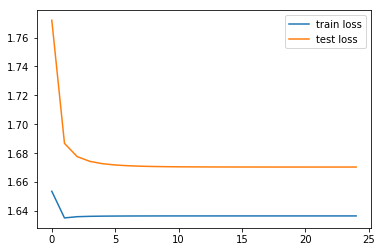

In [54]:
# plot losses
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

## Build the MF-Keras model

In [3]:
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

D:\programming\anaconda5.1.0\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\programming\anaconda5.1.0\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [69]:
N = user_rest_rating.user_idx.max()+1
M = user_rest_rating.rest_idx.max()+1

# initialize variables
K = 8 # latent dimensionality
mu = user_rest_rating.stars.mean()
epochs = 10
reg = 0. # regularization penalty

print(df_train.shape)
print(df_test.shape)
print('mean ratings for restauratns ',mu)
print('# of users ',N)
print('# of restaurants ',M)
print('Latest dimension ',K)

(1059459, 3)
(264865, 3)
mean ratings for restauratns  3.7442665087999614
# of users  544347
# of restaurants  19590
Latest dimension  8


In [70]:
df_train.head()

,rest_idx,user_idx,stars
105219,6988,417594,4.0
1229525,2008,330675,5.0
613440,5019,372470,5.0
195813,13906,192232,4.0
1083320,3070,452500,3.0


In [71]:
u = Input(shape=(1,),name='user-input')
m = Input(shape=(1,),name='rest-input')
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg), name='user-embedding')(u) # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg), name='rest-embedding')(m) # (N, 1, K)

u_bias = Embedding(N, 1, embeddings_regularizer=l2(reg), name='user-bias')(u) # (N, 1, 1)
m_bias = Embedding(M, 1, embeddings_regularizer=l2(reg), name='rest-bias')(m) # (N, 1, 1)

x = Dot(axes=2, name="Dot-Product")([u_embedding, m_embedding]) # (N, 1, 1)
x = Add(name="Add-Emb-Bias")([x, u_bias, m_bias])
x = Flatten(name="Flatten-Users")(x) # (N, 1)

model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.05, momentum=0.9),
  metrics=['mse'],
)

In [72]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user-input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
rest-input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user-embedding (Embedding)      (None, 1, 8)         4354776     user-input[0][0]                 
__________________________________________________________________________________________________
rest-embedding (Embedding)      (None, 1, 8)         156720      rest-input[0][0]                 
__________________________________________________________________________________________________
Dot-Produc

In [73]:
r = model.fit(
  x=[df_train.user_idx.values, df_train.rest_idx.values],
  y=df_train.stars.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.user_idx.values, df_test.rest_idx.values],
    df_test.stars.values - mu
  )
)

Train on 1059459 samples, validate on 264865 samples
Epoch 1/10
1059459/1059459 [==============================] - 349s 330us/step - loss: 1.7389 - mean_squared_error: 1.7389 - val_loss: 1.6625 - val_mean_squared_error: 1.6625
Epoch 2/10
1059459/1059459 [==============================] - 348s 328us/step - loss: 1.5912 - mean_squared_error: 1.5912 - val_loss: 1.6039 - val_mean_squared_error: 1.6039
Epoch 3/10
1059459/1059459 [==============================] - 353s 333us/step - loss: 1.5196 - mean_squared_error: 1.5196 - val_loss: 1.5727 - val_mean_squared_error: 1.5727
Epoch 4/10
1059459/1059459 [==============================] - 352s 332us/step - loss: 1.4695 - mean_squared_error: 1.4695 - val_loss: 1.5529 - val_mean_squared_error: 1.5529
Epoch 5/10
1059459/1059459 [==============================] - 357s 337us/step - loss: 1.4299 - mean_squared_error: 1.4299 - val_loss: 1.5394 - val_mean_squared_error: 1.5394
Epoch 6/10
1059459/1059459 [==============================] - 367s 347us/step

In [108]:
print(df_test.user_idx.values[10:15])
print(df_test.rest_idx.values[10:15])
print(df_test.stars.values[10:15] - mu)
pred = model.predict([df_test.user_idx.values[10:15], df_test.rest_idx.values[10:15]])
print(np.reshape(pred,-1))

[121842 225075  56456 336343 110862]
[ 3684  2453 10174  9588 14748]
[ 1.25573349 -2.74426651 -1.74426651 -1.74426651  0.25573349]
[ 0.35122454 -0.10493046 -1.677135   -0.55075896  0.63722336]


In [84]:
model.save('keras_mf.model')

## Evaluate the MF-Keras

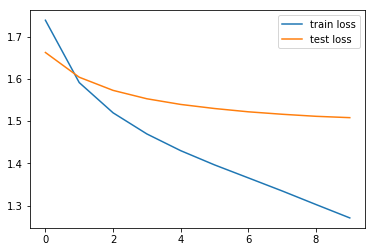

In [85]:
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

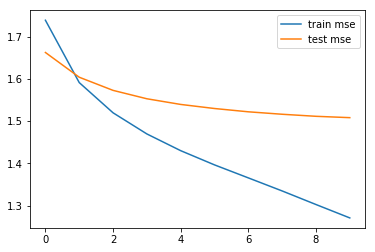

In [86]:
# plot mse
plt.plot(r.history['mean_squared_error'], label="train mse")
plt.plot(r.history['val_mean_squared_error'], label="test mse")
plt.legend()
plt.show()

In [87]:
from keras.models import load_model
from keras import backend as K

In [88]:
model = load_model('keras_mf.model')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user-input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
rest-input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user-embedding (Embedding)      (None, 1, 8)         4354776     user-input[0][0]                 
__________________________________________________________________________________________________
rest-embedding (Embedding)      (None, 1, 8)         156720      rest-input[0][0]                 
__________________________________________________________________________________________________
Dot-Produc

In [127]:
df_test['actual_rating'] = df_test['stars']

D:\programming\anaconda5.1.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
print('mean rating in the data ',mu)
print('test set shape ',df_test.shape)
predictions = model.predict([df_test.user_idx.values, df_test.rest_idx.values])
predictions = np.reshape(predictions,-1)
predictions.shape
# df_test['predicted_rating'] = df_test[['user_idx','rest_idx']]

mean rating in the data  3.7442665087999614
test set shape  (264865, 5)


(264865,)

In [129]:
df_test['predict_rating'] = predictions+mu

D:\programming\anaconda5.1.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_test.head()

,rest_idx,user_idx,stars,actual_rating,predict_rating
312993,16483,529585,4.0,4.0,3.784295
835361,10695,385761,4.0,4.0,4.070486
266034,4716,317906,4.0,4.0,4.626999
437228,15604,378340,5.0,5.0,3.015857
930647,18586,151663,5.0,5.0,4.012570


In [185]:
topK = 5
threshold_avg = 3.0
def getAvgPrecAtK(actual_list, pred_list, topK=topK):
    user_mean_rating = threshold_avg #np.mean(actual_list) #mu 
    act_perd_list = list(zip(actual_list, pred_list))
    relev_list = [rate for rate in act_perd_list if rate[0] >= user_mean_rating]
    
    if len(relev_list) > topK:
        relev_list = relev_list[:topK]
        
    if len(relev_list) == 0:
        return 0.0
        
    score = 0.0
    num_hits = 0.0
    for i,(actual_rate, pred_rate) in enumerate(relev_list):
        if pred_rate >= user_mean_rating :
            num_hits = num_hits + 1.0
            score = score + (num_hits/(i+1.0))
    
    avgPrec = score/min(len(relev_list),topK)
    return avgPrec
   
def getAvgRecallAtK(actual_list, pred_list, topK=topK):
    pass

In [186]:
grped_data = df_test.sort_values(['user_idx','predict_rating'],ascending=False)\
                    .groupby(['user_idx'])\
                    .apply(lambda x : getAvgPrecAtK(x['actual_rating'],x['predict_rating']))\
                    .reset_index()
grped_data.columns = ['user_idx','avgprecision']
grped_data.avgprecision.value_counts()

1.000000    128423
0.000000     40703
0.500000      1860
0.666667       760
0.750000       466
0.800000       389
0.333333       127
0.600000       115
0.400000        49
0.250000        18
0.200000        13
Name: avgprecision, dtype: int64

In [187]:
np.mean(grped_data.avgprecision)

0.755587168855515

In [194]:
print(df_test[df_test.user_idx == 385761])

all_rests = df_test.rest_idx.values
use_array = [385761 for each in all_rests]

pred_rates = model.predict([use_array, all_rests])
pred_rates = np.array(np.reshape(pred_rates,-1))
pred_rates.shape

        rest_idx  user_idx  stars  actual_rating  predict_rating
835361     10695    385761    4.0            4.0        4.070486
462380     10263    385761    2.0            2.0        3.916476
626733     15240    385761    2.0            2.0        3.745585
383089      2323    385761    3.0            3.0        3.811742
860997     13210    385761    3.0            3.0        4.126993
742976     18509    385761    4.0            4.0        4.259332


(264865,)

In [210]:
args_val = (-pred_rates).argsort()[:40]

In [211]:
for each in args_val:
    print('rest_idx {} and predicted rating {}'.format(each,pred_rates[each]+mu))

rest_idx 28518 and predicted rating 4.894116758090428
rest_idx 108206 and predicted rating 4.894116758090428
rest_idx 102941 and predicted rating 4.894116758090428
rest_idx 260731 and predicted rating 4.894116758090428
rest_idx 83154 and predicted rating 4.894116758090428
rest_idx 16726 and predicted rating 4.894116758090428
rest_idx 29459 and predicted rating 4.894116758090428
rest_idx 65793 and predicted rating 4.894116758090428
rest_idx 65728 and predicted rating 4.894116758090428
rest_idx 190980 and predicted rating 4.894116758090428
rest_idx 23485 and predicted rating 4.894116758090428
rest_idx 221942 and predicted rating 4.894116758090428
rest_idx 167225 and predicted rating 4.894116758090428
rest_idx 195198 and predicted rating 4.894116758090428
rest_idx 195161 and predicted rating 4.894116758090428
rest_idx 211549 and predicted rating 4.894116758090428
rest_idx 44744 and predicted rating 4.894116758090428
rest_idx 173629 and predicted rating 4.894116758090428
rest_idx 139566 an

### nDCG validation

In [ ]:
def nDCG()

## End of basic recommendation systems building

In [3]:
np.zeros(50)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])